# Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
%pylab inline

import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


## Combining and Merging Data Sets
### Database-style DataFrame Merges

In [2]:
df1 = DataFrame({'key': list('bbacaab'), 'data1': range(7)})
df2 = DataFrame({'key': list('abd'), 'data2': range(3)})

In [3]:
# 重叠列的列名当键
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [4]:
df3 = DataFrame({'lkey': list('bbacaab'), 'data1': range(7)})
df4 = DataFrame({'rkey': list('abd'), 'data2': range(3)})

In [5]:
# 指定键
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [6]:
# outer 外连接求取键的并集
pd.merge(df3, df4, left_on='lkey', right_on='rkey', how='outer')

,data1,lkey,data2,rkey
0,0.0,b,1.0,b
1,1.0,b,1.0,b
2,6.0,b,1.0,b
3,2.0,a,0.0,a
4,4.0,a,0.0,a
5,5.0,a,0.0,a
6,3.0,c,NaN,NaN
7,NaN,NaN,2.0,d


In [7]:
# left join
pd.merge(df1, df2, how='left')

,data1,key,data2
0,0,b,1.0
1,1,b,1.0
2,2,a,0.0
3,3,c,NaN
4,4,a,0.0
5,5,a,0.0
6,6,b,1.0


In [8]:
# inner join
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [9]:
left = DataFrame({
    'key1': ['foo','foo','bar'],
    'key2': ['one','two','one'],
    'lval': [1,2,3]
})
right = DataFrame({
    'key1': ['foo','foo','bar','bar'],
    'key2': ['one','one','one','two'],
    'lval': [4,5,6,7]
})

# 根据多个键进行合并
pd.merge(left, right, on=['key1','key2'], how='outer')

,key1,key2,lval_x,lval_y
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [10]:
# 合并出现重复 column
pd.merge(left, right, on='key1')

,key1,key2_x,lval_x,key2_y,lval_y
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [11]:
# 自定义重复列名
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval_left,key2_right,lval_right
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


merge 函数的参数

参数 | 说明
---|---
`left` | 参与合并的左侧 DataFrame
`right` | 参与合并的右侧 DataFrame
`how` | `inner`, `outer`, `left`, `right`，默认为 `inner` 
`on` | 用于连接的列名
`left_on` | 左侧 DataFrame 中用作连接键的 column
`right_on` | 右侧 DataFrame 中用作连接键的 column
`left_index` | 将左侧的行索引用作其连接键
`right_index` | 将右侧的行索引用作其连接键
`sort` | 根据连接键对合并后的数据进行排序，默认为 True
`suffixes` | 字符串值 tuple，用于追加重叠 column 的末尾 
`copy` | 设置为 False。某些特殊情况下避免将数据复制到结果数据结构中

### Merging on Index

In [12]:
left1 = DataFrame({'key': list('abaabc'), 'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a','b'])

In [13]:
# 使用 left_index, right_index 说明索引当做连接键
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [14]:
# 层次化数据
lefth = DataFrame({
    'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'key2': [2000, 2001, 2002, 2001, 2002],
    'data': np.arange(5.)})
righth = DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
           [2001, 2000, 2000, 2000, 2001, 2002]],
    columns=['event1', 'event2'])

In [15]:
pd.merge(lefth, righth, left_on=['key1','key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [16]:
pd.merge(lefth, righth, left_on=['key1','key2'], right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [17]:
# 合并索引
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
                  index=['a', 'c', 'e'],
                  columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], 
                   columns=['Missouri', 'Alabama'])

In [18]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [19]:
# 使用 join 实例方法
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [20]:
# 指定键
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [21]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], 
                    columns=['New York', 'Oregon'])

# 向join传入一组DataFrame
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


### Concatenating Along an Axis

In [22]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
# 沿着 index 轴连接 （预设）
np.concatenate([arr,arr])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
# 沿着 column 轴连接
np.concatenate([arr,arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [25]:
s1 = Series([0,1], index=['a','b'])
s2 = Series([2,3,4], index=['c','d','e'])
s3 = Series([5,6], index=['f','g'])

# 沿着 index 轴连接
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [26]:
# 沿着 column 轴连接，变成一个 DataFrame
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [27]:
s4 = pd.concat([s1*5, s3])

# 取合并的交集
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [28]:
# 使用 key 参数在连接轴上创建一个层次化索引
result = pd.concat([s1,s2,s3], keys=['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [29]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [30]:
# 沿着axis=1对Series合并，keys变成DataFrame的列头
pd.concat([s1,s2,s3], axis=1, keys=['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [31]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], 
                columns=['three', 'four'])

In [32]:
# 沿着axis=1对DataFrame合并
pd.concat([df1, df2], axis=1, keys=['group1','group2'])

group1     group2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [33]:
pd.concat({'group1': df1, 'group2': df2}, axis=1)

group1     group2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [34]:
# 管理层次化索引的创建方式
pd.concat([df1, df2], axis=1, keys=['group1','group2'],
         names=['upper', 'lower'])

upper group1     group2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [35]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

# 不保留连接轴上的索引
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.256333,-0.847370,-0.933930,0.249364
1,1.326347,0.316264,1.658155,0.752666
2,3.538758,-1.929178,-0.313479,0.663333
3,-0.192510,-0.738902,NaN,0.047283
4,1.246221,0.912845,NaN,1.075013


concat 函数的参数

参数 | 说明
---|---
`objs` | 参与连接的pandas对象的列表或字典
`axis` | 指明连接的轴向
`join` | `inner`, `outer` 其中之一
`join_axes` | 指明用于其他 n-1 条轴的索引，不执行并集、交集运算
`keys` | 与连接对象有关的值，用于形成连接轴向上的层次化索引
`levels` | 指定用作层次化索引各级上的索引
`names` | 用于创建分层级别的名称
`verify_integrity` | 检查结果对象新轴上的重复情况，如果发现则引发异常。默认 False
`ignore_index` | 不保留连接轴上的索引，产生一组新索引 range

### Combining Data with Overlap

In [36]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [37]:
# 选择性合并
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [38]:
# Series.combine_first 合并，且进行数据对齐
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [39]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan], 
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.], 
                 'b': [np.nan, 3., 4., 6., 8.]})

In [40]:
# 用参数对象中的数据为调用者对象的缺失数据“打补丁”
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting
### Reshaping with Hierarchical Indexing
- `stack`：将数据的 column “旋转”为 row
- `unstack`：将数据的 row “旋转”为 column

In [41]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [42]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [43]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [44]:
df = DataFrame({'left': result, 'right': result + 5},
              columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [45]:
# 进行 unstack 操作，作为旋转轴的级别会成为结果中的最低级别
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [46]:
df.unstack('state').stack('side')

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

### Pivoting “long” to “wide” Format

In [47]:
ldata = DataFrame({
    'date': ['1959-03-31']*3 + ['1959-06-30']*3 + ['1959-09-30']*3 + ['1959-12-31']*3,
    'item': ['R','I','U']*4,
    'value': [2710.349, 0, 5.8, 2778.801, 2.34, 5.1, 2775.488, 2.74, 5.3, 2785.204, 2.66, 5.12]
})

In [48]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,I,R,U
date,,,
1959-03-31,0.00,2710.349,5.80
1959-06-30,2.34,2778.801,5.10
1959-09-30,2.74,2775.488,5.30
1959-12-31,2.66,2785.204,5.12


In [49]:
ldata['value2'] = np.random.randn(len(ldata))
ldata

,date,item,value,value2
0,1959-03-31,R,2710.349,-1.466924
1,1959-03-31,I,0.000,-1.762205
2,1959-03-31,U,5.800,-1.152625
3,1959-06-30,R,2778.801,0.970496
4,1959-06-30,I,2.340,-0.525223
5,1959-06-30,U,5.100,0.704012
6,1959-09-30,R,2775.488,-0.582577
7,1959-09-30,I,2.740,0.656861
8,1959-09-30,U,5.300,-0.331060
9,1959-12-31,R,2785.204,-1.772276


In [50]:
pivoted = ldata.pivot('date', 'item')
pivoted

value                    value2                    
item           I         R     U         I         R         U
date                                                          
1959-03-31  0.00  2710.349  5.80 -1.762205 -1.466924 -1.152625
1959-06-30  2.34  2778.801  5.10 -0.525223  0.970496  0.704012
1959-09-30  2.74  2775.488  5.30  0.656861 -0.582577 -0.331060
1959-12-31  2.66  2785.204  5.12 -0.786057 -1.772276  0.113690

In [51]:
ldata.set_index(['date', 'item']).unstack('item')

value                    value2                    
item           I         R     U         I         R         U
date                                                          
1959-03-31  0.00  2710.349  5.80 -1.762205 -1.466924 -1.152625
1959-06-30  2.34  2778.801  5.10 -0.525223  0.970496  0.704012
1959-09-30  2.74  2775.488  5.30  0.656861 -0.582577 -0.331060
1959-12-31  2.66  2785.204  5.12 -0.786057 -1.772276  0.113690

## Data Transformation
### Removing Duplicates

In [52]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [53]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [54]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [55]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [56]:
# 指定部分 column 进行重复项判断，并保留之后一个
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [57]:
data = DataFrame({
    'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [58]:
meat_to_animal = {'bacon': 'pig', 'pulled pork': 'pig', 'pastrami': 'cow', 'corned beef': 'cow', 'honey ham': 'pig', 'nova lox': 'salmon'}

# 使用 map 映射字典对象
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [59]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

In [60]:
data = Series([1, -999, 2, -999, -1000, 3])

# 把 -999 当成缺失数据的标记值
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [61]:
# 一次替换多个值
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [62]:
# 这对不同值进行不同替换
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [64]:
# 使用字典当参数
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [66]:
np.where(data <= -999, np.nan, data)

array([  1.,  nan,   2.,  nan,  nan,   3.])

### Renaming Axis Indexes

In [68]:
data = DataFrame(np.arange(12).reshape((3,4)),
                index=['Ohio', 'Colorado', 'New York'],
                columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [70]:
# 对轴标签使用map
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [71]:
# 创建数据集的转换版（产生新的DataFrame）
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [72]:
# rename 集合字典对象
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekkabkoo'})

,one,two,peekkabkoo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [74]:
# 使用 inplace 就地修改
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekkabkoo'},
            inplace=True)
data

,one,two,peekkabkoo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and Binning

In [75]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [76]:
bins = [18, 25, 36, 60, 100]

# 返回一个 Categories 对象，表示面元名称的字符串
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 36], (18, 25], ..., (25, 36], (60, 100], (36, 60], (36, 60], (25, 36]]
Length: 12
Categories (4, object): [(18, 25] < (25, 36] < (36, 60] < (60, 100]]

In [82]:
# 原来用 levels，变成 categories
cats.categories

Index([u'(18, 25]', u'(25, 36]', u'(36, 60]', u'(60, 100]'], dtype='object')

In [83]:
# 原来用 labels，变成 codes
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [84]:
# 查看分区出现频率
pd.value_counts(cats)

(18, 25]     5
(36, 60]     3
(25, 36]     3
(60, 100]    1
dtype: int64

In [87]:
# 右侧定义为开端
# 圆括号表示开端（不包含）、方括号表示闭端（包含）
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 36), [25, 36), [18, 25), ..., [25, 36), [60, 100), [36, 60), [36, 60), [25, 36)]
Length: 12
Categories (4, object): [[18, 25) < [25, 36) < [36, 60) < [60, 100)]

In [88]:
# 设置自己的面元名称
group_names = ['Youth','YoungAdult','MiddleAged','Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

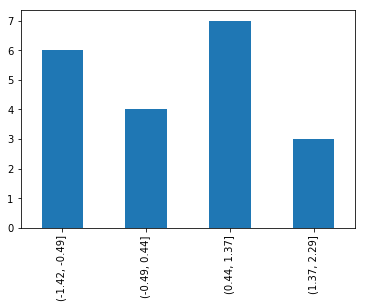

In [97]:
data = np.random.randn(20)

# 如果传入的是“数量”，则根据数据最大、最小值计算等长面元
cats = pd.cut(data, 4, precision=2)
cats.value_counts().plot(kind='bar')

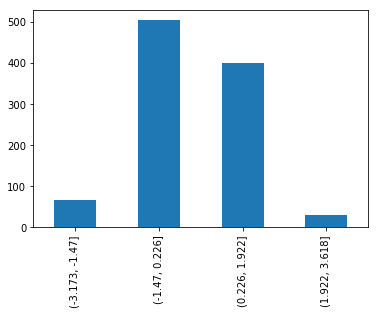

In [99]:
data = np.random.randn(1000)

# 按四分位进行切割
cats = pd.cut(data, 4)
cats.value_counts().plot(kind='bar')

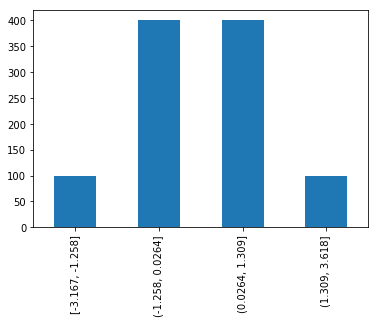

In [100]:
# 自行定义分位数
cats = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1])
cats.value_counts().plot(kind='bar')

### Detecting and Filtering Outliers

In [101]:
np.random.seed(12345)

data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [103]:
# 想找出绝对值大于3的值
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [117]:
# 选出任何含有“绝对值大于3的值”的row
data[(np.abs(data) > 3).any(axis=1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [121]:
# 将“绝对值大于3的值”限制为3
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and Random Sampling

In [124]:
df = DataFrame(np.arange(5*4).reshape(5,4))

array([1, 0, 2, 3, 4])

In [ ]:
# 调用 permutation 产生一个表示新顺序的整数数组
sampler = np.random.permutation(5)
sampler

In [126]:
# 从 permutation 返回的数组中切下前k个元素，其中k为期望的子集大小
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [128]:
bag = np.array(['A','B','C','D','E'])

# 随机从五个元素，重复取出10次
sampler = np.random.randint(0, len(bag), size=10)
draws = bag.take(sampler)
draws

array(['E', 'E', 'C', 'C', 'C', 'A', 'D', 'A', 'E', 'B'], 
      dtype='|S1')

### Computing Indicator/Dummy Variables

In [131]:
df = DataFrame({'key': list('bbacab'), 'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [132]:
# 将分类变量（categorical variable）转换为哑变量矩阵（dummy matriex）
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [133]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [137]:
movies = pd.read_table('ch02/movielens/movies.dat',
                      sep='::',
                      header=None,
                      names=['movie_id', 'title', 'genres'],
                      engine='python')

movies.head()
# genres 同属多个分类，事情有点复杂

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [141]:
# 找出所有genre
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [146]:
# 从一个全零DataFrame开始建构指标DataFrame
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

# 迭代每部电影，根据genres设置dummies各行
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1
    
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [156]:
values = np.random.rand(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

# 结合 get_dummies， cut 产生离散统计数据
pd.get_dummies(pd.cut(values, bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,0,0,0,0,1
7,0,0,0,0,1
8,1,0,0,0,0
9,0,0,1,0,0


## String Manipulation
### String Object Methods

In [161]:
val = 'a,b,  guido'

In [162]:
# 使用 split 拆分字符串
val.split(',')

['a', ' b', '  guido']

In [163]:
# 使用 strip 修剪空白符
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [164]:
# 使用 jion 连接字串
'::'.join(pieces)

'a::b::guido'

In [165]:
# 检测子字串
'guido' in val

True

In [167]:
# 定位子字串
val.index('guido')

7

In [170]:
# find 与 index 不同点在: 如果找不到，index 会引发异常，find 则返回 -1
val.find('foo')

-1

In [171]:
# 计算出现次数
val.count(',')

2

In [172]:
# 替换字串
val.replace(',','::')

'a:: b::  guido'

In [173]:
# 删除字串
val.replace(',', '')

'a b  guido'

Python 内置的字串方法

方法 | 说明
---|---
`count` | 子字串在字符串出现次数
`endswith` | 字符串是否以某个后缀结尾
`startswith` | 字符串是否以某个前缀开头
`join` | 将字符串用作连接其他字符串序列的分隔符
`index` | 返回第一个字符所在的位置，如果没找到引发异常
`find` | 返回第一个字符所在的位置，如果没找到返回-1
`rfind` | 返回最后一个字符所在的位置，如果没找到返回-1
`replace` | 用另一个字串符替换指定字串
`strip`, `rstrip`, `lstrip` | 去除空白符（含换行符）
`split` | 通过质地的分隔符将字符串拆分为一组字串
`lower`, `upper` | 将字母字符转换大小写
`ljust`, `rjust` | 用空格 （或其他字符）填充字符串的空白侧，以返回最低宽度的字符串

### Regular expressions

In [174]:
# re 函数可以分三大类：模式匹配、替换、拆分
import re

In [175]:
text = 'foo bar\t baz \tqux'

# 拆分
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [176]:
# 编译正则表达式 (多次使用，事先编译可节省CPU时间)
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [178]:
# 匹配
regex.findall(text)

[' ', '\t ', ' \t']